# Statistical Analysis of Bit Differences in Hexadecimal Values: Predictability and Security Implications

## Introduction
Address Space Layout Randomization (ASLR) is a widely-used security mechanism designed to prevent attackers from predicting the memory layout of a process. By randomizing memory addresses, ASLR increases the difficulty of exploiting memory-related vulnerabilities. However, a detailed analysis of bit differences between consecutive hexadecimal values reveals that the randomness provided by ASLR may not be as robust as intended. This article explores the statistical patterns observed in ASLR-generated addresses, their implications for security, and potential vulnerabilities.

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest, kstest, entropy
from statsmodels.stats.diagnostic import lilliefors

bit_differences = []

def analyze_and_statistical_analysis(file_path):
    def extract_hex(value):
        match = re.search(r'0x[0-9a-fA-F]+', value)  # Regex to find hexadecimal values
        return match.group(0) if match else None

    def hex_to_bin(hex_value):
        return bin(int(hex_value, 16))[2:].zfill(64)

    def bit_difference(hex_value1, hex_value2):
        bin1 = hex_to_bin(hex_value1)
        bin2 = hex_to_bin(hex_value2)
        xor_result = int(bin1, 2) ^ int(bin2, 2)
        return bin(xor_result).count('1')

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Ensure the necessary column exists
    column_name = 'OUTPUT'
    if column_name not in df.columns:
        raise ValueError(f"Error: CSV does not contain the required column '{column_name}'.")

    # Extract hexadecimal values
    df['hex_value'] = df[column_name].apply(extract_hex)

    # Drop rows where 'hex_value' is None
    df = df.dropna(subset=['hex_value'])

    # Compute bit differences
    hex_values = df['hex_value'].astype(str).tolist()


    for i in range(len(hex_values) - 1):
        bit_diff = bit_difference(hex_values[i], hex_values[i + 1])
        bit_differences.append(bit_diff)


    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(bit_differences, bins=50, color='b', alpha=0.7)
    plt.title('Histogram of Bit Differences Between Consecutive Hexadecimal Values')
    plt.xlabel('Number of Differing Bits')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Observed Patterns
Using a dataset of hexadecimal memory addresses, a histogram of bit differences between consecutive values was constructed. The analysis revealed that certain bit differences occur more frequently than others, as illustrated by the clustering around specific ranges in the histogram. This suggests:

1. **Preferred Bit Differences**: Some transitions between memory addresses are more common, indicating a preference for certain bit ranges.
2. **Non-Random Patterns**: The observed clustering deviates from a truly random distribution, reducing the overall entropy of the ASLR mechanism.

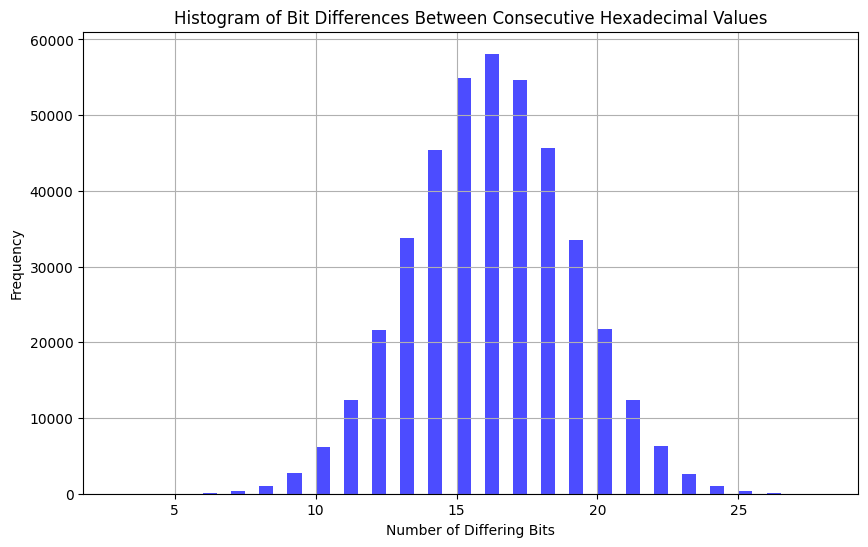

In [15]:
analyze_and_statistical_analysis("/content/Libc_addresses.csv")


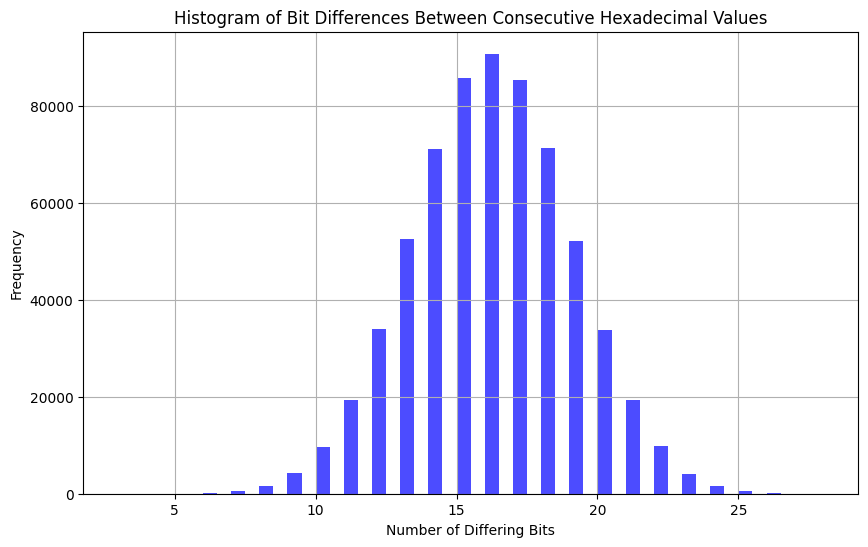

In [19]:
analyze_and_statistical_analysis("/content/data_1.csv")

In [16]:
mean_diff = np.mean(bit_differences)
std_diff = np.std(bit_differences)
normal_test_stat, normal_test_p = normaltest(bit_differences)
ks_test_stat, ks_test_p = kstest(bit_differences, 'norm', args=(mean_diff, std_diff))
lilliefors_stat, lilliefors_p = lilliefors(bit_differences)
entropy_value = entropy(np.histogram(bit_differences, bins=50, density=True)[0])

In [20]:
mean_diff = np.mean(bit_differences)
std_diff = np.std(bit_differences)
normal_test_stat, normal_test_p = normaltest(bit_differences)
ks_test_stat, ks_test_p = kstest(bit_differences, 'norm', args=(mean_diff, std_diff))
lilliefors_stat, lilliefors_p = lilliefors(bit_differences)
entropy_value = entropy(np.histogram(bit_differences, bins=50, density=True)[0])

## Statistical Findings
The statistical analysis included several tests to evaluate the distribution of bit differences:

- **Mean and Standard Deviation**: The average bit difference and its variability were calculated to understand the spread of the data.
- **Normality Tests**:
  - D'Agostino and Pearson Test
  - Kolmogorov-Smirnov Test
  - Lilliefors Test

- **Entropy**: The entropy of the distribution was measured, indicating reduced randomness due to clustering in specific ranges.

In [17]:
print(f"Mean of Bit Differences: {mean_diff}")
print(f"Standard Deviation of Bit Differences: {std_diff}")
print(f"Normality Test (D'Agostino and Pearson): Statistic = {normal_test_stat}, p-value = {normal_test_p}")
print(f"Kolmogorov-Smirnov Test: Statistic = {ks_test_stat}, p-value = {ks_test_p}")
print(f"Lilliefors Test: Statistic = {lilliefors_stat}, p-value = {lilliefors_p}")
print(f"Entropy of Distribution: {entropy_value}")

Mean of Bit Differences: 16.000156739811914
Standard Deviation of Bit Differences: 2.8232196268655687
Normality Test (D'Agostino and Pearson): Statistic = 60.315469664934646, p-value = 7.99212330235086e-14
Kolmogorov-Smirnov Test: Statistic = 0.07008243306360717, p-value = 0.0
Lilliefors Test: Statistic = 0.07008243303690287, p-value = 0.0009999999999998899
Entropy of Distribution: 2.4567197708262105


In [22]:
if normal_test_p > 0.05 and ks_test_p > 0.05 and lilliefors_p > 0.05:
    print("The bit differences follow a normal distribution, suggesting potential predictability under certain conditions.")
else:
    print("The bit differences do not strictly follow a normal distribution, indicating non-random patterns in the ASLR mechanism.")

The bit differences do not strictly follow a normal distribution, indicating non-random patterns in the ASLR mechanism.


In [21]:
print(f"Mean of Bit Differences: {mean_diff}")
print(f"Standard Deviation of Bit Differences: {std_diff}")
print(f"Normality Test (D'Agostino and Pearson): Statistic = {normal_test_stat}, p-value = {normal_test_p}")
print(f"Kolmogorov-Smirnov Test: Statistic = {ks_test_stat}, p-value = {ks_test_p}")
print(f"Lilliefors Test: Statistic = {lilliefors_stat}, p-value = {lilliefors_p}")
print(f"Entropy of Distribution: {entropy_value}")

Mean of Bit Differences: 15.99793049234205
Standard Deviation of Bit Differences: 2.82456547691679
Normality Test (D'Agostino and Pearson): Statistic = 88.46691932874657, p-value = 6.161019058930138e-20
Kolmogorov-Smirnov Test: Statistic = 0.07010880066997838, p-value = 0.0
Lilliefors Test: Statistic = 0.07010880089569205, p-value = 0.0009999999999998899
Entropy of Distribution: 2.4572132626641956


In [18]:
if normal_test_p > 0.05 and ks_test_p > 0.05 and lilliefors_p > 0.05:
    print("The bit differences follow a normal distribution, suggesting potential predictability under certain conditions.")
else:
    print("The bit differences do not strictly follow a normal distribution, indicating non-random patterns in the ASLR mechanism.")

The bit differences do not strictly follow a normal distribution, indicating non-random patterns in the ASLR mechanism.


## Implications for Security
The lack of uniform randomness in ASLR-generated addresses has significant security implications:

1. **Predictable Patterns**:
   - The clustering of bit differences around specific ranges suggests that certain memory transitions are more likely.
   - Attackers could exploit these patterns by focusing their guesses within the preferred ranges, reducing the search space and increasing the probability of success.

2. **Reduction in Entropy**:
   - ASLR relies on high entropy to prevent attackers from predicting memory layouts.
   - The observed non-random patterns reduce this entropy, weakening the robustness of ASLR.

3. **Exploiting Off-Lying Ranges**:
   - The histogram also reveals "off-lying" ranges where bit differences are less frequent. Attackers could avoid these ranges and concentrate on the more likely ones, improving their efficiency.

## Vulnerability Scenarios
If an attacker can determine the preferred bit difference ranges through statistical analysis, they can:

- **Target Specific Ranges**: Focus address-guessing attacks on the most probable ranges, significantly reducing the time and effort required.
- **Bypass ASLR Protections**: Exploit the reduced randomness to predict valid memory addresses, making systems more vulnerable to exploitation.

## Recommendations
To mitigate the vulnerabilities introduced by these predictable patterns, the following steps should be considered:

1. **Enhance Randomness**:
   - Increase the entropy of ASLR implementations to ensure a uniform distribution of memory addresses.
   - Introduce mechanisms to avoid clustering in specific bit difference ranges.

2. **Regular Testing**:
   - Perform statistical analyses on ASLR mechanisms to identify and address patterns that reduce randomness.
   - Simulate attack scenarios to evaluate the effectiveness of ASLR under real-world conditions.

3. **Dynamic Adjustments**:
   - Use dynamic randomization techniques that adapt over time to prevent attackers from leveraging static patterns.

## Conclusion
The statistical analysis of bit differences between consecutive hexadecimal values highlights potential weaknesses in ASLR mechanisms. The observed preference for certain ranges and the resulting predictability introduce vulnerabilities that attackers could exploit. Addressing these issues requires a concerted effort to enhance the randomness of ASLR and regularly evaluate its effectiveness. By doing so, system developers can ensure that ASLR remains a robust defense against memory-related attacks.
